In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Rtl_data = pd.read_excel('Online Retail.xlsx')

In [3]:
Rtl_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
Rtl_data.shape

(541909, 8)

In [5]:
#customer distribution by country
country_cust_data=Rtl_data[['Country','CustomerID']].drop_duplicates()
country_cust_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID',ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [6]:
#Keep only united kingdom data
Rtl_data = Rtl_data.query("Country=='United Kingdom'").reset_index(drop=True)

In [8]:
Rtl_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
495473,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
495474,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
495475,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
495476,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [9]:
#check for missing values
Rtl_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [10]:
#Remove missing values for CustomerID column, can ignore missing values in description column
Rtl_data = Rtl_data[pd.notnull(Rtl_data['CustomerID'])]

#Validate if there are any negative values in quantity column 
Rtl_data.Quantity.min()

-80995

In [11]:
#Validate if there are any negative values in unitPrice column 
Rtl_data.UnitPrice.min()

0.0

In [13]:
#filter out records with negative values
Rtl_data = Rtl_data[(Rtl_data['Quantity']>0)]

In [15]:
#Convert the string data field to datetime
Rtl_data['InvoiceDate'] = pd.to_datetime(Rtl_data['InvoiceDate'])

In [16]:
#Add new column depicting total amount
Rtl_data['TotalAmount'] = Rtl_data['Quantity']*Rtl_data['UnitPrice']

In [17]:
Rtl_data.shape

(354345, 9)

In [18]:
Rtl_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [20]:
# RFM Modelling
#Recency = Latest Date-Last Inovie Data, 
#Frequency = Count of Invocie No. of transaction(s), 
#Monetary = Sum of total spent amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling score for each customer
RFMScores= Rtl_data.groupby('CustomerID').agg({'InvoiceDate':lambda x:(Latest_Date - x.max()).days, 'InvoiceNo':lambda x: len(x), 'TotalAmount': lambda x:x.sum()})

#convert invoice date into type int
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns = {'InvoiceDate': 'Recency',
                           'InvoiceNo': 'Frequency',
                           'TotalAmount': 'Monetary'}, inplace = True)

RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [21]:
#Descriptive Statistics (recency)
RFMScores.Recency.describe()

count    3921.000000
mean       91.722265
std        99.528532
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

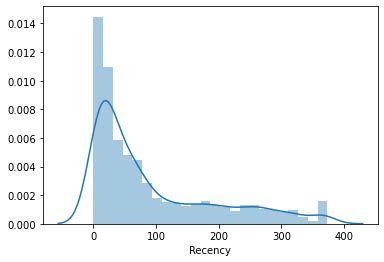

In [24]:
#Recency distribution plot
import seaborn as sns
x=RFMScores['Recency']

ax =sns.distplot(x)

In [25]:
#Descriptive Statistics (recency)
RFMScores.Frequency.describe()

count    3921.000000
mean       90.371079
std       217.796155
min         1.000000
25%        17.000000
50%        41.000000
75%        99.000000
max      7847.000000
Name: Frequency, dtype: float64

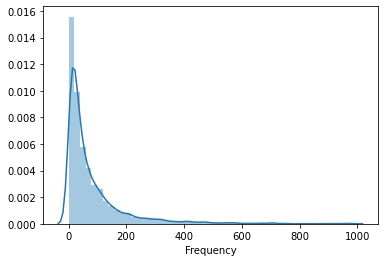

In [27]:
 #Frequency distribution plot
import seaborn as sns
x=RFMScores.query('Frequency <1000')['Frequency']

ax =sns.distplot(x)

In [28]:
#Descriptive Statistics (recency)
RFMScores.Monetary.describe()

count      3921.000000
mean       1863.910113
std        7481.922217
min           0.000000
25%         300.040000
50%         651.820000
75%        1575.890000
max      259657.300000
Name: Monetary, dtype: float64

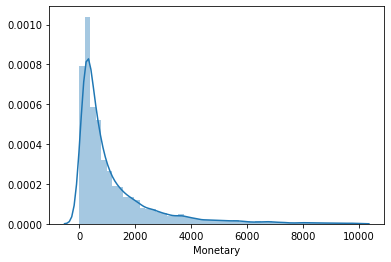

In [29]:
 #Monetary distribution plot, taking observations which have monetary values less than 10000
import seaborn as sns
x=RFMScores.query('Monetary <10000')['Monetary']

ax =sns.distplot(x)

In [30]:
#Split into four segments using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles=quantiles.to_dict()

In [31]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary': {0.25: 300.03999999999996, 0.5: 651.8199999999999, 0.75: 1575.89}}

In [32]:
 #Functions to creat R, F and M Segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
         return 1
    elif x<=d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
         return 4
def FnMScoring(x,p,d):
     if x <= d[p][0.25]:
        return 4
     elif x<=d[p][0.50]:
        return 3
     elif x<=d[p][0.75]:
        return 2
     else:
        return 1

In [35]:
#Calculate Add R, F and M Segment value column in the existing dataset to show R, F and M segment values

RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args = ('Recency', quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(RScoring, args = ('Frequency', quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(RScoring, args = ('Monetary', quantiles,))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,1,4
12747.0,2,103,4196.01,1,4,4
12748.0,0,4596,33719.73,1,4,4
12749.0,3,199,4090.88,1,4,4
12820.0,3,59,942.34,1,3,3


In [38]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#calculate and add RFMScores value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis =1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,1,4,414,9
12747.0,2,103,4196.01,1,4,4,144,9
12748.0,0,4596,33719.73,1,4,4,144,9
12749.0,3,199,4090.88,1,4,4,144,9
12820.0,3,59,942.34,1,3,3,133,7


In [39]:
#Assign Loyalty level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q=4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,4,1,4,414,9,Silver
1,12747.0,2,103,4196.01,1,4,4,144,9,Silver
2,12748.0,0,4596,33719.73,1,4,4,144,9,Silver
3,12749.0,3,199,4090.88,1,4,4,144,9,Silver
4,12820.0,3,59,942.34,1,3,3,133,7,Gold


In [40]:
#Validate the data for RFMGroup = 111
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,14480.0,11,13,279.05,1,1,1,111,3,Platinum
1,16313.0,3,16,274.15,1,1,1,111,3,Platinum
2,14520.0,1,4,270.60,1,1,1,111,3,Platinum
3,12962.0,7,16,266.39,1,1,1,111,3,Platinum
4,13277.0,15,8,258.40,1,1,1,111,3,Platinum
5,13404.0,1,11,252.49,1,1,1,111,3,Platinum
6,13207.0,15,8,250.26,1,1,1,111,3,Platinum
7,16596.0,15,12,250.15,1,1,1,111,3,Platinum
8,13349.0,10,16,247.32,1,1,1,111,3,Platinum
9,15783.0,10,14,246.30,1,1,1,111,3,Platinum


In [43]:
# K - Means Clustering
import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as gobj

In [49]:
#Recency vs Frequency
graph = RFMScores.query('Monetary<50000 and Frequency<2000')

plot_data=[
    gobj.Scatter(
    x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
    y=graph.query("RFM_Loyalty_Level =='Bronze'")['Frequency'],
    mode = 'markers',
    name='Bronze',
    marker = dict(size=7,
                 line=dict(width=1),
                 color ='blue',
                 opacity=0.8
                 )
    ),
    gobj.Scatter(
    x=graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
    y=graph.query("RFM_Loyalty_Level =='Silver'")['Frequency'],
    mode = 'markers',
    name='Silver',
    marker = dict(size=9,
                 line=dict(width=1),
                 color ='green',
                 opacity=0.5 
                 )
    ),
    
    gobj.Scatter(
    x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
    y=graph.query("RFM_Loyalty_Level =='Gold'")['Frequency'],
    mode = 'markers',
    name='Gold',
    marker = dict(size=11,
                 line=dict(width=1),
                 color ='red',
                 opacity=0.9
                 )
    ),
    gobj.Scatter(
    x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
    y=graph.query("RFM_Loyalty_Level =='Platinum'")['Frequency'],
    mode = 'markers',
    name='Platinum',
    marker = dict(size=13,
                 line=dict(width=1),
                 color ='black',
                 opacity=0.9
                 )
    ),
]

plot_layout = gobj.Layout(
        yaxis={'title': "Frequency"},
        xaxis={'title': "Recency"},
        title='Segments'
)
fig = gobj.Figure(data =plot_data, layout=plot_layout)
po.iplot(fig)

#Frequency Vs Monetary 
graph = RFMScores.query('Monetary<50000 and Frequency<2000')

plot_data=[
    gobj.Scatter(
    x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
    y=graph.query("RFM_Loyalty_Level =='Bronze'")['Monetary'],
    mode = 'markers',
    name='Bronze',
    marker = dict(size=7,
                 line=dict(width=1),
                 color ='blue',
                 opacity=0.8
                 )
    ),
    gobj.Scatter(
    x=graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
    y=graph.query("RFM_Loyalty_Level =='Silver'")['Monetary'],
    mode = 'markers',
    name='Silver',
    marker = dict(size=9,
                 line=dict(width=1),
                 color ='green',
                 opacity=0.5 
                 )
    ),
    
    gobj.Scatter(
    x=graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
    y=graph.query("RFM_Loyalty_Level =='Gold'")['Monetary'],
    mode = 'markers',
    name='Gold',
    marker = dict(size=11,
                 line=dict(width=1),
                 color ='red',
                 opacity=0.9
                 )
    ),
    gobj.Scatter(
    x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
    y=graph.query("RFM_Loyalty_Level =='Platinum'")['Monetary'],
    mode = 'markers',
    name='Platinum',
    marker = dict(size=13,
                 line=dict(width=1),
                 color ='black',
                 opacity=0.9
                 )
    ),
]

plot_layout = gobj.Layout(
        yaxis={'title': "Monetary"},
        xaxis={'title': "Frequency"},
        title='Segments'
)
fig = gobj.Figure(data =plot_data, layout=plot_layout)
po.iplot(fig)

#Recency Vs Monetary
graph = RFMScores.query('Monetary<50000 and Frequency<2000')

plot_data=[
    gobj.Scatter(
    x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
    y=graph.query("RFM_Loyalty_Level =='Bronze'")['Monetary'],
    mode = 'markers',
    name='Bronze',
    marker = dict(size=7,
                 line=dict(width=1),
                 color ='blue',
                 opacity=0.8
                 )
    ),
    gobj.Scatter(
    x=graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
    y=graph.query("RFM_Loyalty_Level =='Silver'")['Monetary'],
    mode = 'markers',
    name='Silver',
    marker = dict(size=9,
                 line=dict(width=1),
                 color ='green',
                 opacity=0.5 
                 )
    ),
    
    gobj.Scatter(
    x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
    y=graph.query("RFM_Loyalty_Level =='Gold'")['Monetary'],
    mode = 'markers',
    name='Gold',
    marker = dict(size=11,
                 line=dict(width=1),
                 color ='red',
                 opacity=0.9
                 )
    ),
    gobj.Scatter(
    x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
    y=graph.query("RFM_Loyalty_Level =='Platinum'")['Monetary'],
    mode = 'markers',
    name='Platinum',
    marker = dict(size=13,
                 line=dict(width=1),
                 color ='black',
                 opacity=0.9
                 )
    ),
]

plot_layout = gobj.Layout(
        yaxis={'title': "Monetary"},
        xaxis={'title': "Recency"},
        title='Segments'
)
fig = gobj.Figure(data =plot_data, layout=plot_layout)
po.iplot(fig)